## Importing Packages

In [3]:
import warnings
warnings.simplefilter("ignore")

In [4]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 30)
import matplotlib.pyplot as plt
import seaborn as sns

## Reading Datasets

In [139]:
# Dataset contains the stats for the individual matches played between teams across various tournaments.
matchStats = pd.read_csv('matchStats_needed.csv')
matchStats.head()

,MatchId,MatchResult,SeasonId,Team1,Team1Score,Team1_all_outs_conceded,Team2,Team2Score,Team2_all_outs_conceded,home_team_name
0,Match 1,U Mumba beat Jaipur Pink Panthers (45 - 31),Season 1,Jaipur Pink Panthers,28.0,4.0,U Mumba,44.0,2.0,U Mumba
1,Match 2,Bengaluru Bulls beat Dabang Delhi (47 - 28),Season 1,Bengaluru Bulls,42.0,0.0,Dabang Delhi K.C.,28.0,6.0,TBC
2,Match 3,Bengaluru Bulls beat Puneri Paltan (40 - 37),Season 1,Bengaluru Bulls,39.0,2.0,Puneri Paltan,34.0,4.0,TBC
3,Match 4,U Mumba beat Bengal Warriors (36 - 25),Season 1,Bengal Warriors,24.0,2.0,U Mumba,35.0,0.0,U Mumba
4,Match 5,Dabang Delhi beat Puneri Paltan (35 - 31),Season 1,Dabang Delhi K.C.,35.0,2.0,Puneri Paltan,31.0,2.0,TBC


In [140]:
matchStats.drop(['MatchResult', 'home_team_name'], axis=1, inplace=True)

In [141]:
matchStats['SeasonId'].value_counts()

 Season 6    138
 Season 5    138
 Season 7    112
 Season 2     60
 Season 3     60
 Season 1     60
 Season 4     60
Name: SeasonId, dtype: int64

In [144]:
## There is no missing data.
matchStats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628 entries, 0 to 627
Data columns (total 8 columns):
MatchId                    628 non-null object
SeasonId                   628 non-null object
Team1                      628 non-null object
Team1Score                 628 non-null float64
Team1_all_outs_conceded    628 non-null float64
Team2                      628 non-null object
Team2Score                 628 non-null float64
Team2_all_outs_conceded    628 non-null float64
dtypes: float64(4), object(4)
memory usage: 39.3+ KB


In [143]:
# Dataset contains team level statastics across various seasons played. data also has overall statastics including 
# season 7 matches played till date.
teamData = pd.read_csv('teamStats_needed.csv')
teamData.head()

,stats_status,team_name,total_matches,wins,losses,draws,total_raids,success_raids,all_outs,unsuccess_raids,empty_raid,success_raid_percent,super_raids,total_tackles,success_tackles,unsuccesful_tackles,tackle_success_rate,super_tackles,green_cards,yellow_cards,red_cards
0,Season 1,Bengaluru Bulls,16.0,8.0,7.0,1.0,647.0,225.0,20.0,172.0,250.0,45.0,7.0,353.0,153.0,200.0,46.0,10.0,8.0,1.0,0.0
1,Season 2,Bengaluru Bulls,16.0,10.0,6.0,0.0,730.0,194.0,25.0,163.0,373.0,35.0,10.0,341.0,158.0,183.0,48.0,7.0,24.0,0.0,0.0
2,Season 3,Bengaluru Bulls,14.0,2.0,12.0,0.0,603.0,158.0,12.0,148.0,297.0,35.0,9.0,291.0,94.0,197.0,34.0,7.0,5.0,3.0,1.0
3,Season 4,Bengaluru Bulls,14.0,5.0,8.0,1.0,605.0,157.0,9.0,143.0,305.0,33.0,4.0,287.0,109.0,178.0,43.0,15.0,3.0,0.0,0.0
4,Season 5,Bengaluru Bulls,22.0,8.0,11.0,3.0,943.0,336.0,28.0,195.0,412.0,42.0,5.0,480.0,185.0,295.0,42.0,17.0,8.0,0.0,1.0


In [10]:
teamData.shape

(80, 21)

In [145]:
teamData['stats_status'].value_counts()

 Season 7    12
 Season 5    12
 Season 6    12
 Season 4     8
 Season 2     8
 Season 3     8
 Season 1     8
Name: stats_status, dtype: int64

In [146]:
## Filling missing values with Overall as they depicts Overall Results
teamData.fillna('Overall', inplace=True)

In [147]:
# Dataset contains totalpoint scored by the teams across various seasons
totalPointData = pd.read_csv('totalPointData_needed.csv')
totalPointData.head()

,match_played,rank,season,team_id,team_name,total_points
0,16.0,1,Season 1,3.0,Jaipur Pink Panthers,579.0
1,16.0,2,Season 1,5.0,U Mumba,550.0
2,16.0,3,Season 1,6.0,Patna Pirates,504.0
3,16.0,4,Season 1,1.0,Bengaluru Bulls,498.0
4,14.0,5,Season 1,8.0,Telugu Titans,497.0


In [14]:
totalPointData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 6 columns):
match_played    80 non-null float64
rank            80 non-null int64
season          80 non-null object
team_id         80 non-null float64
team_name       80 non-null object
total_points    80 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 3.8+ KB


In [15]:
# Dropping team_id as its not needed in the prediction
totalPointData.drop('team_id', axis=1, inplace=True)

In [16]:
# Dataset contains player level data and there performance across various seasons
playerData = pd.read_csv('playerData_needed.csv')
playerData.head()

,series_name,team_name,player_name,position_name,match_played,total_points,total_raid_points,tackle_points,total_raids,success_raids,unsuccess_raids,empty_raid,super_raids,success_raid_percent,tackle_success_rate,total_tackles,success_tackles,unsuccesful_tackles,super_tackles,most_point_in_a_match,green_cards,yellow_cards,red_cards
0,Season 1,Puneri Paltan,Takamitsu Kono,All Rounder,1.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,100.0,100.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0
1,Season 2,Puneri Paltan,Takamitsu Kono,All Rounder,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Season 3,Puneri Paltan,Takamitsu Kono,All Rounder,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Season 5,Puneri Paltan,Takamitsu Kono,All Rounder,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Season 6,Puneri Paltan,Takamitsu Kono,All Rounder,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
playerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 23 columns):
series_name              1409 non-null object
team_name                1375 non-null object
player_name              1409 non-null object
position_name            1375 non-null object
match_played             1409 non-null float64
total_points             1409 non-null float64
total_raid_points        1409 non-null float64
tackle_points            1409 non-null float64
total_raids              1409 non-null float64
success_raids            1409 non-null float64
unsuccess_raids          1409 non-null float64
empty_raid               1409 non-null float64
super_raids              1409 non-null float64
success_raid_percent     1409 non-null float64
tackle_success_rate      1409 non-null float64
total_tackles            1409 non-null float64
success_tackles          1409 non-null float64
unsuccesful_tackles      1409 non-null float64
super_tackles            1409 non-null float64
most

In [18]:
# Checking players for which team is not assigned in data
playerData[playerData['team_name'].isnull()].head()

,series_name,team_name,player_name,position_name,match_played,total_points,total_raid_points,tackle_points,total_raids,success_raids,unsuccess_raids,empty_raid,super_raids,success_raid_percent,tackle_success_rate,total_tackles,success_tackles,unsuccesful_tackles,super_tackles,most_point_in_a_match,green_cards,yellow_cards,red_cards
26,Season 1,NaN,Sinotharan Kanesharajah,NaN,1.0,5.0,4.0,1.0,5.0,2.0,0.0,3.0,1.0,80.00,100.00,1.0,1.0,0.0,0.0,5.0,0.0,0.0,0.0
27,Season 2,NaN,Sinotharan Kanesharajah,NaN,2.0,1.0,1.0,0.0,3.0,0.0,1.0,2.0,0.0,33.33,0.00,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
28,Overall,NaN,Sinotharan Kanesharajah,NaN,3.0,6.0,5.0,1.0,8.0,2.0,1.0,5.0,1.0,62.50,50.00,2.0,1.0,1.0,0.0,5.0,0.0,0.0,0.0
129,Season 1,NaN,Kuldeep Singh,NaN,3.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.00,35.71,14.0,4.0,10.0,1.0,3.0,0.0,0.0,0.0
130,Season 3,NaN,Kuldeep Singh,NaN,1.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.00,75.00,4.0,3.0,1.0,0.0,3.0,0.0,0.0,0.0


In [19]:
# Checking players for which position data is missing
playerData[playerData['position_name'].isnull()].head()

,series_name,team_name,player_name,position_name,match_played,total_points,total_raid_points,tackle_points,total_raids,success_raids,unsuccess_raids,empty_raid,super_raids,success_raid_percent,tackle_success_rate,total_tackles,success_tackles,unsuccesful_tackles,super_tackles,most_point_in_a_match,green_cards,yellow_cards,red_cards
26,Season 1,NaN,Sinotharan Kanesharajah,NaN,1.0,5.0,4.0,1.0,5.0,2.0,0.0,3.0,1.0,80.00,100.00,1.0,1.0,0.0,0.0,5.0,0.0,0.0,0.0
27,Season 2,NaN,Sinotharan Kanesharajah,NaN,2.0,1.0,1.0,0.0,3.0,0.0,1.0,2.0,0.0,33.33,0.00,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
28,Overall,NaN,Sinotharan Kanesharajah,NaN,3.0,6.0,5.0,1.0,8.0,2.0,1.0,5.0,1.0,62.50,50.00,2.0,1.0,1.0,0.0,5.0,0.0,0.0,0.0
129,Season 1,NaN,Kuldeep Singh,NaN,3.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.00,35.71,14.0,4.0,10.0,1.0,3.0,0.0,0.0,0.0
130,Season 3,NaN,Kuldeep Singh,NaN,1.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.00,75.00,4.0,3.0,1.0,0.0,3.0,0.0,0.0,0.0


`Inference`: There are rows which doesn't have team name and postion name. We are not removing these rows and will be checking if these players are present in season 7. As the target goal is to predict the results on Season 7.

In [150]:
# Checking no of players data in each team accross all the seasons
playerData[~playerData['series_name'].str.contains('Overall')]['team_name'].value_counts()

Bengal Warriors          106
Tamil Thalaivas          101
Dabang Delhi K.C.        101
Bengaluru Bulls           92
Jaipur Pink Panthers      91
Haryana Steelers          88
Puneri Paltan             85
U Mumba                   80
Gujarat Fortunegiants     79
Patna Pirates             76
U.P. Yoddha               70
Telugu Titans             60
Name: team_name, dtype: int64

In [21]:
playerData['series_name'].value_counts()

 Overall     357
 Season 6    254
 Season 5    219
 Season 7    191
 Season 4    112
 Season 3    111
 Season 2    100
 Season 1     65
Name: series_name, dtype: int64

## Calculation for the task:
#### 1. Task 6: Predict the player with the highest SUCCESSFUL RAID percentage. - Pardeep Narwal
#### 2. Task 7: Predict the player with the highest SUCCESSFUL TACKLE percentage.  - Fazel Atrachali

In [22]:
# Getting data for the season 7 players
season7_players = playerData[playerData['series_name'].str.contains('Season 7')]['player_name'].unique()

In [23]:
# Total there are 187 players in season 7
season7_players.shape

(187,)

In [24]:
season7_players_data = playerData[playerData['player_name'].isin(season7_players.tolist())]

In [25]:
season7_players_data.head()

,series_name,team_name,player_name,position_name,match_played,total_points,total_raid_points,tackle_points,total_raids,success_raids,unsuccess_raids,empty_raid,super_raids,success_raid_percent,tackle_success_rate,total_tackles,success_tackles,unsuccesful_tackles,super_tackles,most_point_in_a_match,green_cards,yellow_cards,red_cards
16,Season 1,Bengaluru Bulls,Sanjay Shrestha,All Rounder,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,Season 2,Bengaluru Bulls,Sanjay Shrestha,All Rounder,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,Season 3,Bengaluru Bulls,Sanjay Shrestha,All Rounder,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,Season 4,Bengaluru Bulls,Sanjay Shrestha,All Rounder,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,Season 5,Bengaluru Bulls,Sanjay Shrestha,All Rounder,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [151]:
## Verifying data for Season 7
playerData[playerData['series_name'].str.contains('Season 7')].sort_values('match_played', ascending=False).head(5)

,series_name,team_name,player_name,position_name,match_played,total_points,total_raid_points,tackle_points,total_raids,success_raids,unsuccess_raids,empty_raid,super_raids,success_raid_percent,tackle_success_rate,total_tackles,success_tackles,unsuccesful_tackles,super_tackles,most_point_in_a_match,green_cards,yellow_cards,red_cards
69,Season 7,Jaipur Pink Panthers,Deepak Niwas Hooda,All Rounder,20.0,158.0,146.0,12.0,304.0,113.0,58.0,133.0,2.0,48.02,44.44,27.0,10.0,17.0,2.0,14.0,0.0,0.0,0.0
692,Season 7,Jaipur Pink Panthers,Sandeep Kumar Dhull,"Defender, left corner",20.0,68.0,1.0,67.0,3.0,0.0,1.0,2.0,0.0,33.33,50.37,133.0,60.0,73.0,7.0,8.0,1.0,0.0,0.0
502,Season 7,Patna Pirates,Pardeep Narwal,Raider,19.0,243.0,243.0,0.0,383.0,190.0,95.0,98.0,12.0,63.44,0.00,2.0,0.0,2.0,0.0,26.0,2.0,0.0,0.0
1112,Season 7,Puneri Paltan,Manjeet,Raider,19.0,126.0,99.0,27.0,233.0,82.0,56.0,95.0,2.0,42.48,48.21,56.0,26.0,30.0,1.0,16.0,0.0,0.0,0.0
1171,Season 7,Bengaluru Bulls,Amit Sheoran,Defender,19.0,43.0,0.0,43.0,1.0,0.0,1.0,0.0,0.0,0.00,51.80,83.0,40.0,43.0,3.0,6.0,1.0,0.0,0.0


In [159]:
df_season = season7_players_data

In [160]:
df_season.head()

,series_name,team_name,player_name,position_name,match_played,total_points,total_raid_points,tackle_points,total_raids,success_raids,unsuccess_raids,empty_raid,super_raids,success_raid_percent,tackle_success_rate,total_tackles,success_tackles,unsuccesful_tackles,super_tackles,most_point_in_a_match,green_cards,yellow_cards,red_cards
16,Season 1,Bengaluru Bulls,Sanjay Shrestha,All Rounder,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,Season 2,Bengaluru Bulls,Sanjay Shrestha,All Rounder,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,Season 3,Bengaluru Bulls,Sanjay Shrestha,All Rounder,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,Season 4,Bengaluru Bulls,Sanjay Shrestha,All Rounder,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,Season 5,Bengaluru Bulls,Sanjay Shrestha,All Rounder,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [161]:
## Concatinating dataset to generate derived feature
team_data_temp = teamData[['stats_status', 'team_name', 'total_matches']]

df_season = pd.merge(team_data_temp, df_season,
                                   left_on=['stats_status', 'team_name'], right_on=['series_name', 'team_name'])
df_season.drop(['stats_status'], axis=1, inplace=True)

In [162]:
df_season.head()

,team_name,total_matches,series_name,player_name,position_name,match_played,total_points,total_raid_points,tackle_points,total_raids,success_raids,unsuccess_raids,empty_raid,super_raids,success_raid_percent,tackle_success_rate,total_tackles,success_tackles,unsuccesful_tackles,super_tackles,most_point_in_a_match,green_cards,yellow_cards,red_cards
0,Bengaluru Bulls,16.0,Season 1,Sanjay Shrestha,All Rounder,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Bengaluru Bulls,16.0,Season 1,Raju Lal Choudhary,"Defender, right corner",5.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,16.66,12.0,2.0,10.0,0.0,2.0,0.0,0.0,0.0
2,Bengaluru Bulls,16.0,Season 2,Sanjay Shrestha,All Rounder,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bengaluru Bulls,16.0,Season 2,Raju Lal Choudhary,"Defender, right corner",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Bengaluru Bulls,16.0,Season 2,Ashish Kumar,All Rounder,5.0,5.0,2.0,3.0,10.0,2.0,1.0,7.0,0.0,20.0,30.00,10.0,2.0,8.0,1.0,4.0,1.0,0.0,0.0


## Predict the player with the highest SUCCESSFUL RAID percentage

In [163]:
## Creating derived feature to penalize the player for not doing any raid in the match which is played by the team
df_season['weighted_success_raid_percent'] = (df_season['success_raid_percent'] * df_season['match_played'
                                                                                          ]) / df_season['total_matches']

df_season['weighted_success_tackle_percent'] = (df_season['tackle_success_rate'] * df_season['match_played'
                                                                                          ]) / df_season['total_matches']


In [164]:
df = df_season[['weighted_success_raid_percent', 'series_name', 'player_name', 
               'total_raids', 'unsuccess_raids', 'empty_raid', 'super_raids', 'success_raid_percent']].sort_values(
    'weighted_success_raid_percent', ascending=False)

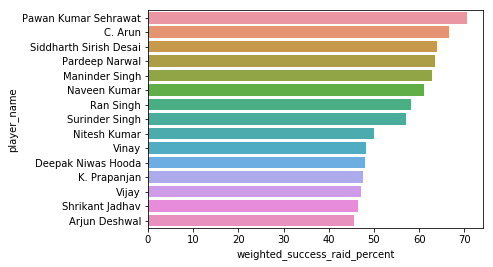

In [165]:
# Checking the current status of successful tackles based on the matches played so far in season 7 for top 15 players.
data = df[df['series_name'].str.contains('Season 7')].head(15)
sns.barplot(x="weighted_success_raid_percent", y="player_name", data=data) 
plt.show()

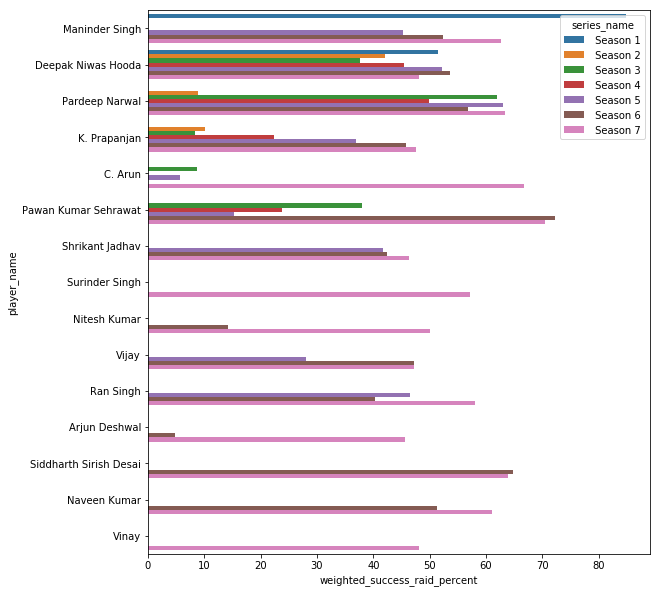

In [166]:
# Comparing the results across all the season for top 15 players.
data = df[df['player_name'].isin(data['player_name'].unique().tolist())]
plt.figure(figsize=(9,10))
sns.barplot(x="weighted_success_raid_percent", y="player_name", hue="series_name", data=data.sort_values(
    'series_name'))
plt.show()

In [167]:
# Ranking weighted_success_raid_percent based on the season.
season_list = df_season['series_name'].unique().tolist()

df_raid_rank = pd.DataFrame()
for index in range(0, len(season_list)):
    temp = data.loc[data['series_name'].str.contains(season_list[index])]
    temp['rank'] = temp['weighted_success_raid_percent'].rank(method='min')
    df_raid_rank = df_raid_rank.append(temp, ignore_index=True)

df_raid_rank = df_raid_rank.sort_values(['series_name'])
df_raid_rank.head()

,weighted_success_raid_percent,series_name,player_name,total_raids,unsuccess_raids,empty_raid,super_raids,success_raid_percent,rank
0,84.891429,Season 1,Maninder Singh,175.0,42.0,30.0,3.0,74.28,2.0
1,51.432500,Season 1,Deepak Niwas Hooda,148.0,32.0,44.0,3.0,58.78,1.0
2,42.010714,Season 2,Deepak Niwas Hooda,153.0,27.0,72.0,1.0,39.21,5.0
3,10.202857,Season 2,K. Prapanjan,14.0,4.0,7.0,0.0,35.71,4.0
4,8.880000,Season 2,Pardeep Narwal,38.0,12.0,19.0,1.0,23.68,3.0


In [168]:
# Giving weightage to the current form of the player:
# Sesaon 1, Season 2, Season 3 and Season 4: Giving 5 percent weightage
# Season 5: Giving 10 percent weightage
# Season 6: Giving 20 percent weightage
# Season 7: Giving 50 percent weightage. Giving highest weitage to cuurent season because it depicts the current form
# of the player
weighted_seasons = {' Season 1': 5,' Season 2': 5,' Season 3': 5,' Season 4': 5,' Season 5': 10,' Season 6': 20,
                    ' Season 7': 50}

def calculateWeightedRank(x):
    return x['success_raid_percent'] * weighted_seasons[x['series_name']]
df_raid_rank['weighted_success_raid_percent'] = df_raid_rank.apply(calculateWeightedRank, axis = 1)

In [169]:
# Data Cleaning: Converting series_name column to numeric
df_raid_rank['formatted_series_name'] = df_raid_rank['series_name'].str.split('Season ').str[1]
df_raid_rank['formatted_series_name'] = pd.to_numeric(df_raid_rank['formatted_series_name'])

In [170]:
df_raid_rank.head()

,weighted_success_raid_percent,series_name,player_name,total_raids,unsuccess_raids,empty_raid,super_raids,success_raid_percent,rank,formatted_series_name
0,371.40,Season 1,Maninder Singh,175.0,42.0,30.0,3.0,74.28,2.0,1
1,293.90,Season 1,Deepak Niwas Hooda,148.0,32.0,44.0,3.0,58.78,1.0,1
2,196.05,Season 2,Deepak Niwas Hooda,153.0,27.0,72.0,1.0,39.21,5.0,2
3,178.55,Season 2,K. Prapanjan,14.0,4.0,7.0,0.0,35.71,4.0,2
4,118.40,Season 2,Pardeep Narwal,38.0,12.0,19.0,1.0,23.68,3.0,2


In [171]:
# Training the Linear Regression model to predict the rank of the players.
# Using data from Season 1 to Season 6 for the traning. And Season 7 to predict the results.
col = ['weighted_success_raid_percent', 'formatted_series_name', 'total_raids', 'unsuccess_raids', 'empty_raid',
      'super_raids', 'success_raid_percent']
from sklearn.linear_model import LinearRegression
X = df_raid_rank[df_raid_rank['formatted_series_name'] != 7][col].values
y = df_raid_rank[df_raid_rank['formatted_series_name'] != 7]['rank'].values
reg = LinearRegression().fit(X, y)

In [172]:
df_raid_rank[col].head()

,weighted_success_raid_percent,formatted_series_name,total_raids,unsuccess_raids,empty_raid,super_raids,success_raid_percent
0,371.40,1,175.0,42.0,30.0,3.0,74.28
1,293.90,1,148.0,32.0,44.0,3.0,58.78
2,196.05,2,153.0,27.0,72.0,1.0,39.21
3,178.55,2,14.0,4.0,7.0,0.0,35.71
4,118.40,2,38.0,12.0,19.0,1.0,23.68


In [173]:
X_pred = df_raid_rank[df_raid_rank['formatted_series_name'] == 7][col].values
pred_values = reg.predict(X_pred)

In [174]:
df = pd.DataFrame()
df['val'] = pred_values.round(2)
df['player_name'] = df_raid_rank[df_raid_rank['formatted_series_name'] == 7]['player_name'].values
df.head()

,val,player_name
0,15.80,Vijay
1,16.77,K. Prapanjan
2,16.28,Deepak Niwas Hooda
3,16.47,Vinay
4,14.81,Nitesh Kumar


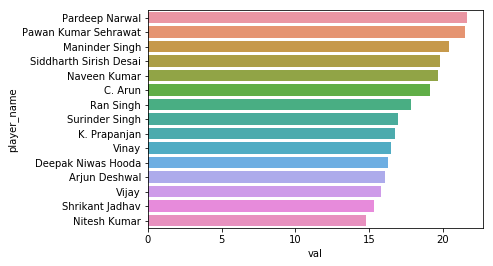

In [175]:
sns.barplot(x='val', y='player_name', data= df.sort_values('val',ascending=False))
plt.show()

In [176]:
df_raid_rank[df_raid_rank['player_name'].str.contains('Pardeep')]

,weighted_success_raid_percent,series_name,player_name,total_raids,unsuccess_raids,empty_raid,super_raids,success_raid_percent,rank,formatted_series_name
4,118.40,Season 2,Pardeep Narwal,38.0,12.0,19.0,1.0,23.68,3.0,2
7,310.15,Season 3,Pardeep Narwal,187.0,45.0,59.0,10.0,62.03,5.0,3
12,249.00,Season 4,Pardeep Narwal,263.0,63.0,100.0,3.0,49.80,5.0,4
17,629.60,Season 5,Pardeep Narwal,586.0,113.0,202.0,18.0,62.96,11.0,5
30,1191.80,Season 6,Pardeep Narwal,391.0,93.0,113.0,6.0,59.59,12.0,6
45,3172.00,Season 7,Pardeep Narwal,383.0,95.0,98.0,12.0,63.44,12.0,7


`Inference: ` Pardeep Narwalis likely to perform best and we have verified the results with the matches played in current season.

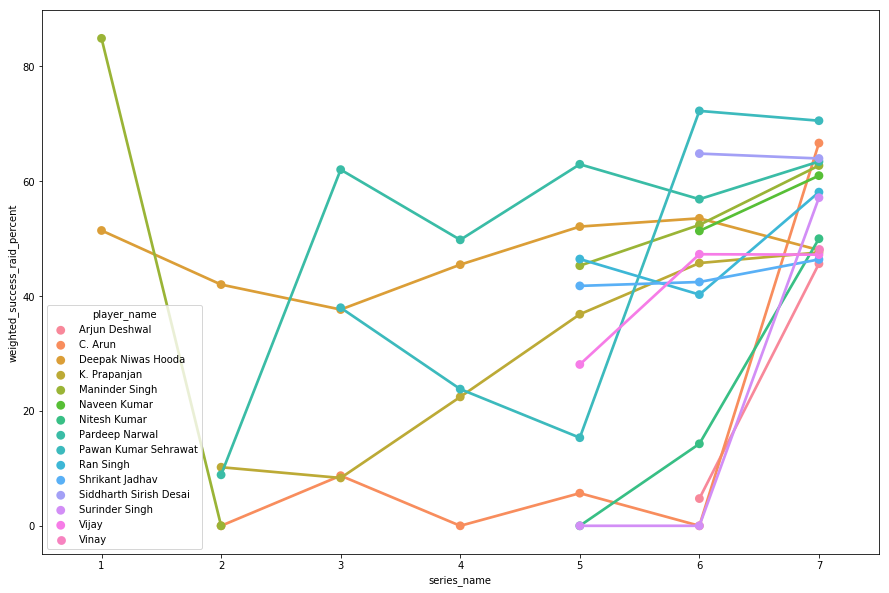

In [177]:
## Plotting trend plot to visualize how top players of season 7 have been preforming in past seasons
data = df_season[df_season['player_name'].isin(data['player_name'].unique().tolist())].sort_values('series_name')
t = data.groupby(['player_name','series_name']).mean().reset_index()
t['series_name'] = t['series_name'].str.split('Season ').str[1]
plt.figure(figsize=(15,10))
sns.pointplot(x="series_name", y="weighted_success_raid_percent", hue='player_name',  data=t)
plt.show()

## Predict the player with the highest SUCCESSFUL TACKLE percentage.
Repeating the same steps used for predecting the Successful raids.

In [191]:
df = df_season[['weighted_success_tackle_percent', 'series_name', 'player_name', 'tackle_points', 'tackle_success_rate', 'total_tackles', 
                'success_tackles', 'unsuccesful_tackles', 'super_tackles']].sort_values(
    'weighted_success_tackle_percent', ascending=False)


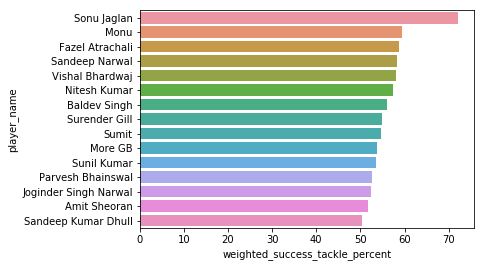

In [192]:
data = df[df['series_name'].str.contains('Season 7')].head(15)
sns.barplot(x="weighted_success_tackle_percent", y="player_name", data=data)
plt.show()

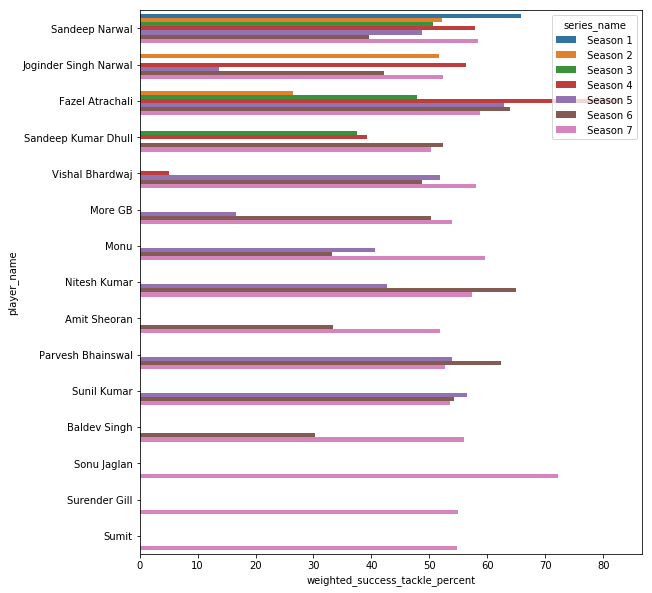

In [193]:
data = df[df['player_name'].isin(data['player_name'].unique().tolist())]
plt.figure(figsize=(9,10))
sns.barplot(x="weighted_success_tackle_percent", y="player_name", hue="series_name", data=data.sort_values(
    'series_name'))
plt.show()

In [181]:
season_list = t['series_name'].unique().tolist()

df_tackle_rank = pd.DataFrame()
for index in range(0, len(season_list)):
    temp = data.loc[data['series_name'].str.contains(season_list[index])]
    temp['rank']= temp['weighted_success_tackle_percent'].rank(method='min')
    df_tackle_rank = df_tackle_rank.append(temp, ignore_index=True)

df_tackle_rank = df_tackle_rank.sort_values(['series_name'])
df_tackle_rank.head()

,weighted_success_tackle_percent,series_name,player_name,tackle_points,tackle_success_rate,total_tackles,success_tackles,unsuccesful_tackles,super_tackles,rank
49,65.850000,Season 1,Sandeep Narwal,27.0,65.85,41.0,21.0,20.0,6.0,1.0
28,51.720000,Season 2,Joginder Singh Narwal,30.0,51.72,58.0,30.0,28.0,0.0,2.0
29,26.440625,Season 2,Fazel Atrachali,11.0,84.61,13.0,9.0,4.0,2.0,1.0
27,52.110000,Season 2,Sandeep Narwal,37.0,52.11,71.0,34.0,37.0,3.0,3.0
30,50.653750,Season 3,Sandeep Narwal,55.0,57.89,95.0,53.0,42.0,2.0,4.0


In [182]:
df_tackle_rank['formatted_series_name'] = df_tackle_rank['series_name'].str.split('Season ').str[1]
df_tackle_rank['formatted_series_name'] = pd.to_numeric(df_tackle_rank['formatted_series_name'])

In [183]:
# Giving weightage to the current form of the player:
# Sesaon 1, Season 2, Season 3 and Season 4: Giving 5 percent weightage
# Season 5: Giving 10 percent weightage
# Season 6: Giving 20 percent weightage
# Season 7: Giving 50 percent weightage. Giving highest weitage to cuurent season because it depicts the current form
# of the player
weighted_seasons = {' Season 1': 5,' Season 2': 5,' Season 3': 5,' Season 4': 5,' Season 5': 10,' Season 6': 20,
                    ' Season 7': 50}

def calculateWeightedRank(x):
    return x['success_tackles'] * weighted_seasons[x['series_name']]
df_tackle_rank['weighted_success_tackle_percent'] = df_tackle_rank.apply(calculateWeightedRank, axis = 1)

In [184]:
df_tackle_rank.head()

,weighted_success_tackle_percent,series_name,player_name,tackle_points,tackle_success_rate,total_tackles,success_tackles,unsuccesful_tackles,super_tackles,rank,formatted_series_name
49,105.0,Season 1,Sandeep Narwal,27.0,65.85,41.0,21.0,20.0,6.0,1.0,1
28,150.0,Season 2,Joginder Singh Narwal,30.0,51.72,58.0,30.0,28.0,0.0,2.0,2
29,45.0,Season 2,Fazel Atrachali,11.0,84.61,13.0,9.0,4.0,2.0,1.0,2
27,170.0,Season 2,Sandeep Narwal,37.0,52.11,71.0,34.0,37.0,3.0,3.0,2
30,265.0,Season 3,Sandeep Narwal,55.0,57.89,95.0,53.0,42.0,2.0,4.0,3


In [185]:
# Training the Linear Regression model to predict the rank of the players.
# Using data from Season 1 to Season 6 for the traning. And Season 7 to predict the results.
col = ['weighted_success_tackle_percent', 'tackle_points', 'tackle_success_rate', 'total_tackles', 'success_tackles',
      'unsuccesful_tackles', 'super_tackles']
from sklearn.linear_model import LinearRegression
X = df_tackle_rank[df_tackle_rank['formatted_series_name'] != 7][col].values
y = df_tackle_rank[df_tackle_rank['formatted_series_name'] != 7]['rank'].values
reg = LinearRegression().fit(X, y)

In [186]:
X_pred = df_tackle_rank[df_tackle_rank['formatted_series_name'] == 7][col].values
pred_values = reg.predict(X_pred)

In [187]:
df = pd.DataFrame()
df['val'] = pred_values.round(2)
df['player_name'] = df_tackle_rank[df_tackle_rank['formatted_series_name'] == 7]['player_name'].values
df.head()

,val,player_name
0,7.47,Sunil Kumar
1,1.78,Sonu Jaglan
2,3.71,Monu
3,10.70,Fazel Atrachali
4,7.35,Sandeep Narwal


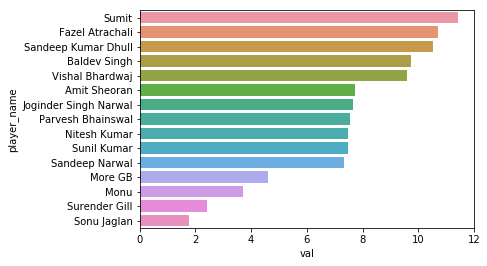

In [188]:
sns.barplot(x="val", y="player_name", data=df.sort_values('val', ascending=False))
plt.show()

`Inference: ` Since Sumit is playing only from Season 7 and we dont have past data for him. Therefore it's difficult to make prediction. Hence Fazel Atrachali has high chances to win most successful tackles. And we have verified the results with on going matches.

In [190]:
df_tackle_rank[df_tackle_rank['player_name'].str.contains('Fazel')]

,weighted_success_tackle_percent,series_name,player_name,tackle_points,tackle_success_rate,total_tackles,success_tackles,unsuccesful_tackles,super_tackles,rank,formatted_series_name
29,45.0,Season 2,Fazel Atrachali,11.0,84.61,13.0,9.0,4.0,2.0,1.0,2
31,160.0,Season 3,Fazel Atrachali,32.0,69.56,46.0,32.0,14.0,0.0,3.0,3
34,225.0,Season 4,Fazel Atrachali,52.0,72.22,72.0,45.0,27.0,7.0,5.0,4
39,540.0,Season 5,Fazel Atrachali,57.0,57.57,99.0,54.0,45.0,3.0,10.0,5
1,1600.0,Season 6,Fazel Atrachali,83.0,63.84,130.0,80.0,50.0,3.0,11.0,6
14,2700.0,Season 7,Fazel Atrachali,57.0,58.76,97.0,54.0,43.0,3.0,13.0,7


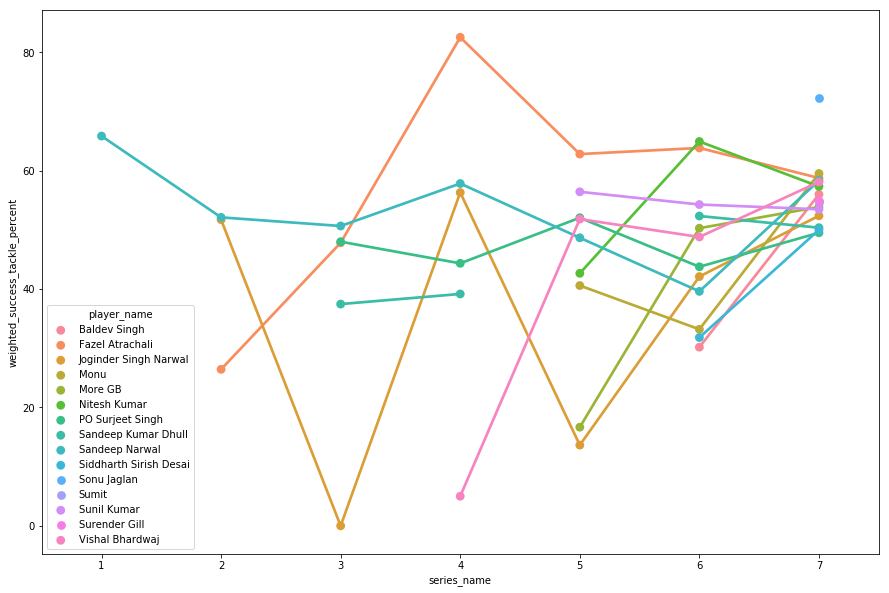

In [59]:
## Plotting trend plot to visualize how top players of season 7 have been preforming in past seasons
data = df_season[df_season['player_name'].isin(data['player_name'].unique().tolist())].sort_values('series_name')
t = data.groupby(['player_name','series_name']).mean().reset_index()
t['series_name'] = t['series_name'].str.split('Season ').str[1]
plt.figure(figsize=(15,10))
sns.pointplot(x="series_name", y="weighted_success_tackle_percent", hue='player_name',  data=t)
plt.show()

## Calculation for the task:
#### 1. Task 1: Predict the winner of the tournament: Dabang Delhi K.C.
#### 2. Task 2: Predict the top team in the points table after the completion of the league matches: Dabang Delhi K.C.


In [60]:
## Creating dervied column as winner: Depecting who has won the match
def winnner(x):
    if x['Team1Score'] > x['Team2Score']:
        return x['Team1']
    else:
        return x['Team2']

In [61]:
# Creating a column stating the winner of the matches happened in the tournament across all seasons.
matchStats['winner'] = matchStats.apply(winnner, axis = 1)

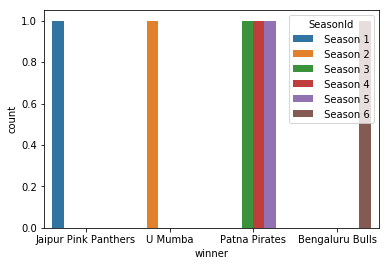

In [62]:
# Getting the count of team winnning the matches in the finals in past seasons.
df = matchStats[matchStats['MatchId'] == 'Final']

sns.countplot(x="winner", hue="SeasonId", data=df)
plt.show()

`Inference: ` Patna Pirates has won most of the finals.

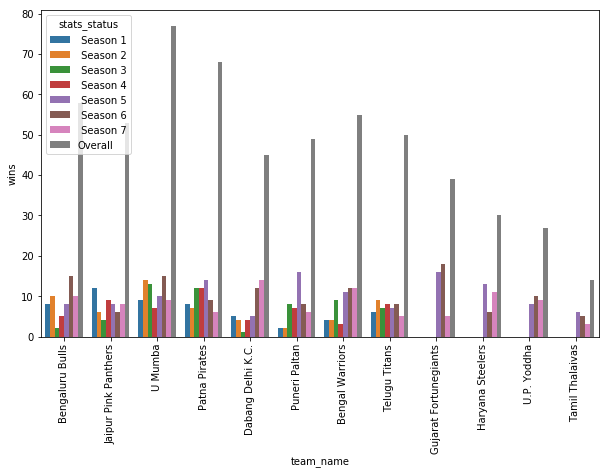

In [63]:
# Getting the count of matches teams won in each seasons
plt.figure(figsize=(10,6))
sns.barplot(x="team_name", y="wins", hue="stats_status", data=teamData.sort_values('stats_status'))
plt.xticks(rotation=90)
plt.show()

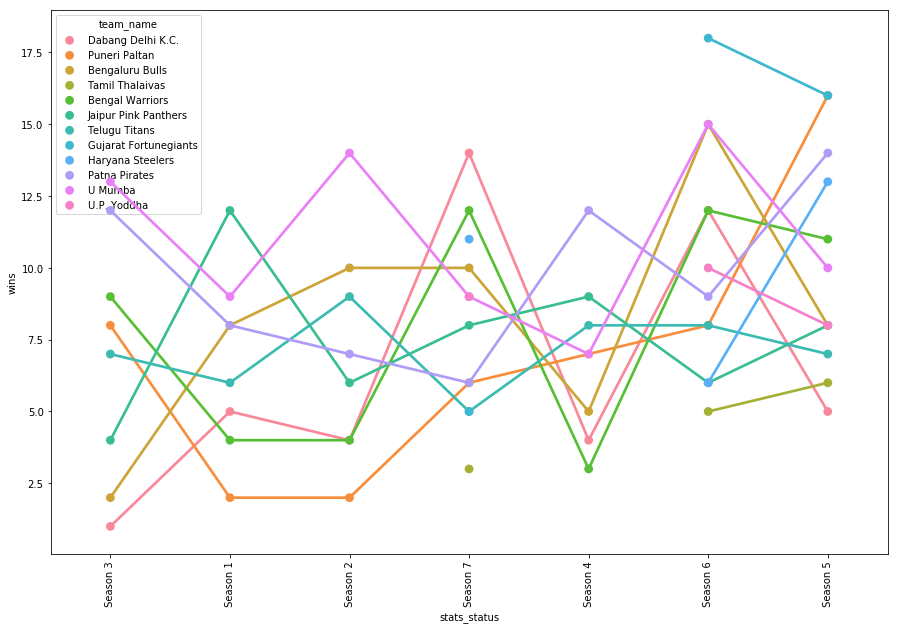

In [194]:
# Getting the overall trend of the matches won by the team in various seasons
data = teamData[~teamData['stats_status'].str.contains('Overall')]
plt.figure(figsize=(15,10))
sns.pointplot(x="stats_status", y="wins", hue='team_name',  data=data.sort_values('wins'))
plt.xticks(rotation=90)
plt.show()

In [65]:
# Creating a drived column team rank based on the number of matches won and ranking them across different seasons
data = teamData[~teamData['stats_status'].str.contains('Overall')]
season_list = data['stats_status'].unique().tolist()

df_team_rank = pd.DataFrame()
for index in range(0, len(season_list)):
    temp = teamData.loc[teamData['stats_status'].str.contains(season_list[index])]
    temp['team_rank']= (temp['wins'] / temp['total_matches']).rank(method='min')
    df_team_rank = df_team_rank.append(temp, ignore_index=True)

df_team_rank = df_team_rank.sort_values(['stats_status'])
df_team_rank.head()

,stats_status,team_name,total_matches,wins,losses,draws,total_raids,success_raids,all_outs,unsuccess_raids,empty_raid,success_raid_percent,super_raids,total_tackles,success_tackles,unsuccesful_tackles,tackle_success_rate,super_tackles,green_cards,yellow_cards,red_cards,team_rank
0,Season 1,Bengaluru Bulls,16.0,8.0,7.0,1.0,647.0,225.0,20.0,172.0,250.0,45.0,7.0,353.0,153.0,200.0,46.0,10.0,8.0,1.0,0.0,5.0
1,Season 1,Dabang Delhi K.C.,14.0,5.0,8.0,1.0,559.0,246.0,18.0,139.0,174.0,51.0,5.0,370.0,124.0,246.0,36.0,10.0,10.0,0.0,0.0,3.0
2,Season 1,Jaipur Pink Panthers,16.0,12.0,3.0,1.0,621.0,270.0,29.0,125.0,226.0,55.0,9.0,400.0,158.0,242.0,42.0,12.0,5.0,0.0,0.0,8.0
3,Season 1,Bengal Warriors,14.0,4.0,9.0,1.0,546.0,213.0,11.0,146.0,187.0,52.0,11.0,381.0,106.0,275.0,32.0,16.0,5.0,0.0,0.0,2.0
4,Season 1,U Mumba,16.0,9.0,4.0,3.0,624.0,270.0,21.0,134.0,220.0,56.0,12.0,409.0,145.0,264.0,38.0,12.0,3.0,0.0,0.0,7.0


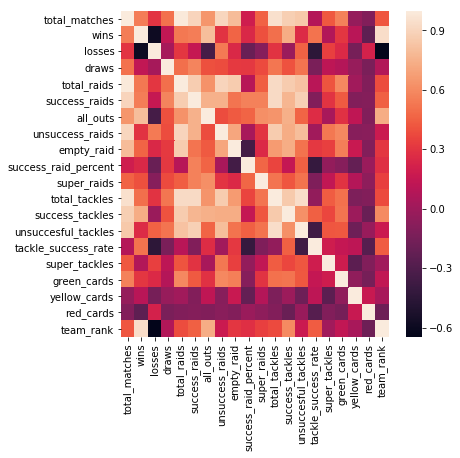

In [66]:
# Checking the correlated columns before creating regression model
plt.figure(figsize=(6,6))
sns.heatmap(df_team_rank.corr())
plt.show()

`Inference: ` win and losses and tacke_sucess_rate and losses have high correlation and it is expected. Thereofre we are not treating anything.

In [67]:
# Converting series column to integer
df_team_rank['formatted_series_name'] = df_team_rank['stats_status'].str.split('Season ').str[1]
df_team_rank['formatted_series_name'] = pd.to_numeric(df_team_rank['formatted_series_name'])

In [68]:
df_team_rank.columns

Index(['stats_status', 'team_name', 'total_matches', 'wins', 'losses', 'draws',
       'total_raids', 'success_raids', 'all_outs', 'unsuccess_raids',
       'empty_raid', 'success_raid_percent', 'super_raids', 'total_tackles',
       'success_tackles', 'unsuccesful_tackles', 'tackle_success_rate',
       'super_tackles', 'green_cards', 'yellow_cards', 'red_cards',
       'team_rank', 'formatted_series_name'],
      dtype='object')

In [69]:
# Training the Linear Regression model to predict the rank of the team.
# Using data from Season 1 to Season 6 for the traning. And Season 7 to predict the results.
col = ['total_matches', 'wins', 'losses', 'draws', 'total_raids',
      'success_raids', 'all_outs', 'unsuccess_raids',
       'empty_raid', 'success_raid_percent', 'super_raids', 'total_tackles',
       'success_tackles', 'unsuccesful_tackles', 'tackle_success_rate',
       'super_tackles', 'green_cards', 'yellow_cards', 'red_cards']
from sklearn.linear_model import LinearRegression
X = df_team_rank[df_team_rank['formatted_series_name'] != 7][col].values
y = df_team_rank[df_team_rank['formatted_series_name'] != 7]['team_rank'].values
reg = LinearRegression().fit(X, y)

In [70]:
# Using Season 7 data for predictions
X_pred = df_team_rank[df_team_rank['formatted_series_name'] == 7][col].values
pred_values = reg.predict(X_pred)

In [71]:
df = pd.DataFrame()
df['val'] = pred_values.round(2)
df['team_name'] = df_team_rank[df_team_rank['formatted_series_name'] == 7]['team_name'].values
df.head()

,val,team_name
0,1.26,Tamil Thalaivas
1,7.78,Haryana Steelers
2,2.37,Telugu Titans
3,3.06,Puneri Paltan
4,2.82,Patna Pirates


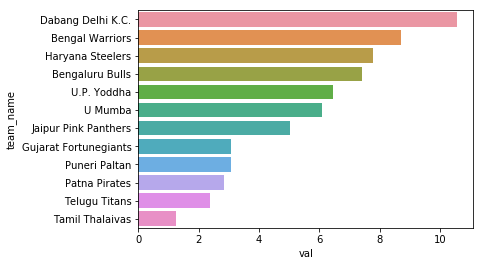

In [72]:
sns.barplot(x="val", y="team_name", data=df.sort_values('val', ascending=False))
plt.show()

`Inference: ` Dabang Delhi K. C. has high probability to qualify on the top of the table. Also there is high probability that winner of tournament will be either Dabang Delhi K. C., Benal Warriors, Haryana Steelers and Bengaluru Bulls.

In [73]:
df_team_rank[df_team_rank['team_name'].str.contains('Delhi')]

,stats_status,team_name,total_matches,wins,losses,draws,total_raids,success_raids,all_outs,unsuccess_raids,empty_raid,success_raid_percent,super_raids,total_tackles,success_tackles,unsuccesful_tackles,tackle_success_rate,super_tackles,green_cards,yellow_cards,red_cards,team_rank,formatted_series_name
1,Season 1,Dabang Delhi K.C.,14.0,5.0,8.0,1.0,559.0,246.0,18.0,139.0,174.0,51.0,5.0,370.0,124.0,246.0,36.0,10.0,10.0,0.0,0.0,3.0,1
9,Season 2,Dabang Delhi K.C.,14.0,4.0,9.0,1.0,585.0,159.0,13.0,151.0,275.0,37.0,14.0,333.0,122.0,211.0,41.0,14.0,13.0,0.0,0.0,2.0,2
17,Season 3,Dabang Delhi K.C.,14.0,1.0,12.0,1.0,614.0,171.0,9.0,162.0,281.0,38.0,5.0,346.0,98.0,248.0,32.0,13.0,4.0,1.0,0.0,1.0,3
25,Season 4,Dabang Delhi K.C.,14.0,4.0,9.0,1.0,619.0,162.0,15.0,120.0,337.0,37.0,11.0,306.0,116.0,190.0,44.0,20.0,2.0,0.0,0.0,2.0,4
33,Season 5,Dabang Delhi K.C.,22.0,5.0,16.0,1.0,973.0,283.0,18.0,214.0,476.0,35.0,6.0,497.0,159.0,338.0,34.0,12.0,12.0,0.0,0.0,1.0,5
45,Season 6,Dabang Delhi K.C.,24.0,12.0,10.0,2.0,997.0,401.0,34.0,224.0,372.0,48.0,13.0,559.0,198.0,361.0,39.0,19.0,14.0,0.0,0.0,8.0,6
57,Season 7,Dabang Delhi K.C.,18.0,14.0,2.0,2.0,729.0,312.0,29.0,143.0,274.0,52.0,8.0,422.0,162.0,260.0,40.0,8.0,2.0,0.0,0.0,12.0,7


## Predicting winner of the tournament

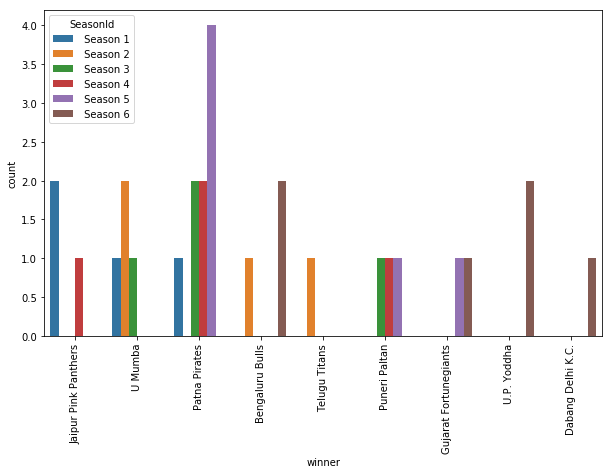

In [74]:
# Count of matches team winnning at crutial stages
data = matchStats[~((matchStats['MatchId'].str.contains('Match')) | (matchStats['MatchId'].str.contains('match')))]
plt.figure(figsize=(10,6))
sns.countplot(x="winner", hue="SeasonId", data=data)
plt.xticks(rotation=90)
plt.show()

In [75]:
# Creating data set of the qualifiers, playoffs, semis and Finals matches played across various seasons
data = matchStats[~((matchStats['MatchId'].str.contains('Match')) | (
    matchStats['MatchId'].str.contains('match')))]
data.head()

,MatchId,SeasonId,Team1,Team1Score,Team1_all_outs_conceded,Team2,Team2Score,Team2_all_outs_conceded,winner
56,Semi-Final 1,Season 1,Jaipur Pink Panthers,36.0,0.0,Patna Pirates,17.0,6.0,Jaipur Pink Panthers
57,Semi-Final 2,Season 1,Bengaluru Bulls,22.0,2.0,U Mumba,26.0,2.0,U Mumba
58,3rd Place Playoff,Season 1,Bengaluru Bulls,22.0,2.0,Patna Pirates,29.0,0.0,Patna Pirates
59,Final,Season 1,Jaipur Pink Panthers,34.0,0.0,U Mumba,22.0,4.0,Jaipur Pink Panthers
116,Semi-Final 1,Season 2,Telugu Titans,38.0,0.0,Bengaluru Bulls,39.0,0.0,Bengaluru Bulls


In [76]:
# Creating dataset with the count of crutial matches won by the teams across seasons
data_df = data.groupby(['winner', 'SeasonId'])['MatchId'].count().reset_index()
data_df['SeasonId'] = data_df['SeasonId'].str.strip()
data_df.head()

,winner,SeasonId,MatchId
0,Bengaluru Bulls,Season 2,1
1,Bengaluru Bulls,Season 6,2
2,Dabang Delhi K.C.,Season 6,1
3,Gujarat Fortunegiants,Season 5,1
4,Gujarat Fortunegiants,Season 6,1


In [77]:
## Coverting series column to integer
totalPointData['formatted_series_name'] = totalPointData['season'].str.split('Season ').str[1]
totalPointData['formatted_series_name'] = pd.to_numeric(totalPointData['formatted_series_name'])

In [78]:
totalPointData.head()

,match_played,rank,season,team_name,total_points,formatted_series_name
0,16.0,1,Season 1,Jaipur Pink Panthers,579.0,1.0
1,16.0,2,Season 1,U Mumba,550.0,1.0
2,16.0,3,Season 1,Patna Pirates,504.0,1.0
3,16.0,4,Season 1,Bengaluru Bulls,498.0,1.0
4,14.0,5,Season 1,Telugu Titans,497.0,1.0


In [195]:
## Merging count of matches won at crucial stages and total points earned in each season ny the top teams
data_df_final = pd.merge(data_df, totalPointData, left_on=['SeasonId', 'winner'], right_on = ['season', 
                                                                            'team_name'], how='left')

In [196]:
## Renaming column name
data_df_final = data_df_final.rename(columns = {"MatchId": "matches_crutial_win"})
data_df_final.head()

,winner,SeasonId,matches_crutial_win,match_played,rank,season,team_id,team_name,total_points
0,Bengaluru Bulls,Season 2,1,16.0,2,Season 2,1.0,Bengaluru Bulls,508.0
1,Bengaluru Bulls,Season 6,2,24.0,1,Season 6,1.0,Bengaluru Bulls,887.0
2,Dabang Delhi K.C.,Season 6,1,24.0,4,Season 6,2.0,Dabang Delhi K.C.,822.0
3,Gujarat Fortunegiants,Season 5,1,24.0,2,Season 5,31.0,Gujarat Fortunegiants,775.0
4,Gujarat Fortunegiants,Season 6,1,25.0,2,Season 6,31.0,Gujarat Fortunegiants,876.0


In [81]:
# Training the Linear Regression model to predict the tournament winner.
# Using data from Season 1 to Season 6 for the traning. And Season 7 to predict the results.

col = ['total_points', 'match_played', 'matches_crutial_win']
from sklearn.linear_model import LinearRegression
X = data_df_final[data_df_final['formatted_series_name'] != 7][col].values
y = data_df_final[data_df_final['formatted_series_name'] != 7]['rank'].values
reg = LinearRegression().fit(X, y)

In [82]:
test_df = totalPointData[totalPointData['formatted_series_name'] == 7]
test_df['matches_crutial_win'] = 0
test_df.head()

,match_played,rank,season,team_name,total_points,formatted_series_name,matches_crutial_win
56,19.0,1,Season 7,Dabang Delhi K.C.,709.0,7.0,0
57,19.0,2,Season 7,Bengal Warriors,676.0,7.0,0
58,19.0,3,Season 7,Bengaluru Bulls,656.0,7.0,0
59,20.0,4,Season 7,Puneri Paltan,652.0,7.0,0
60,19.0,5,Season 7,Patna Pirates,640.0,7.0,0


In [83]:
X_pred = test_df[col].values
pred_values = reg.predict(X_pred)

In [84]:
df = pd.DataFrame()
df['val'] = pred_values.round(2)
df['team_name'] = test_df['team_name'].values
df.head()

,val,team_name
0,0.20,Dabang Delhi K.C.
1,0.88,Bengal Warriors
2,1.29,Bengaluru Bulls
3,2.19,Puneri Paltan
4,1.62,Patna Pirates


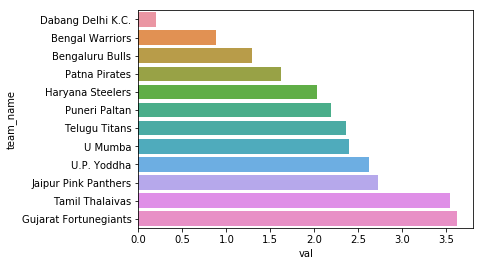

In [85]:
sns.barplot(x="val", y="team_name", data=df.sort_values('val', ascending=True))
plt.show()

`Inference: ` Since our here we are not using python rank function(where high rank is better) and we have original ranks of the teams. Thefore team having less regression value has high chances to win the tournament.

In [197]:
data_df_final[data_df_final['team_name'].str.contains('Delhi')]

,winner,SeasonId,matches_crutial_win,match_played,rank,season,team_id,team_name,total_points
2,Dabang Delhi K.C.,Season 6,1,24.0,4,Season 6,2.0,Dabang Delhi K.C.,822.0


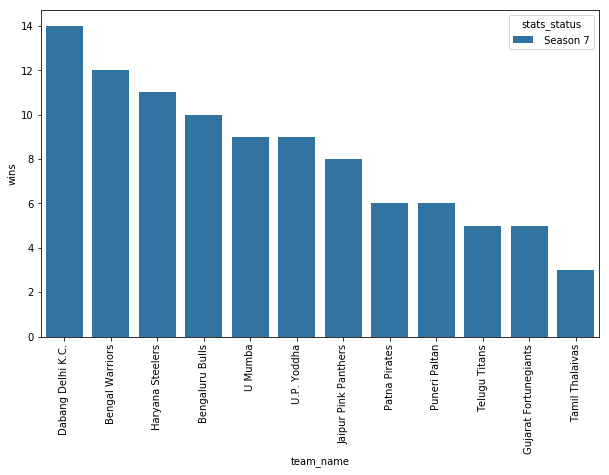

In [87]:
data = teamData[teamData['stats_status'].str.contains('Season 7')]
plt.figure(figsize=(10,6))
sns.barplot(x="team_name", y="wins", hue="stats_status", data=data.sort_values('wins', ascending=False))
plt.xticks(rotation=90)
plt.show()

`Inference: ` Based on the current progress Delhi is much ahead of other teams and has high probability of winning the tournament as well.

## Calculation for the task:
#### 1. Task 3: Predict the team with the highest points for successful raids. - Delhi dabangg
#### 2. Task 4: Predict the team with the highest points for successful tackles. - Jaipur Pink Panthers
#### 3. Task5: Predict the team with the highest super-performance total. - Bengal Warriors

## Team having Successful raids

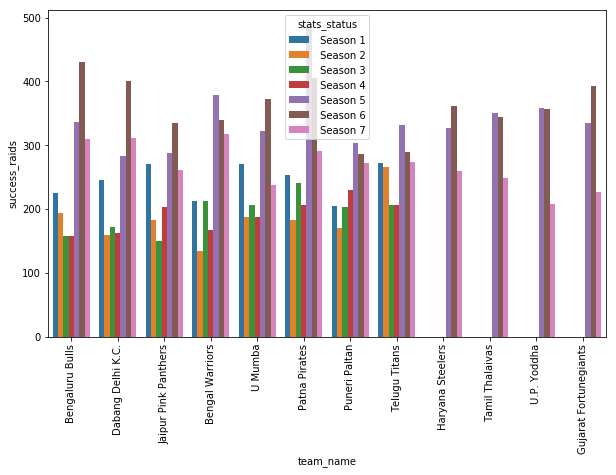

In [88]:
# Figure showing the teams having sucessfull raids across various seasons
data = teamData[~teamData['stats_status'].str.contains('Overall')]
plt.figure(figsize=(10,6))
sns.barplot(x="team_name", y="success_raids", hue="stats_status", data=data)
plt.xticks(rotation=90)
plt.show()

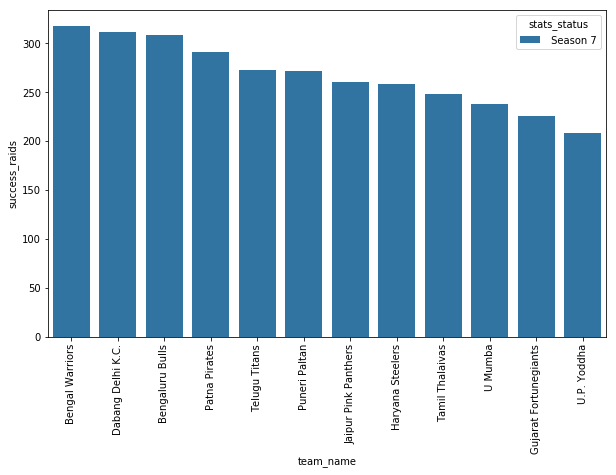

In [89]:
# Sucessfull raids only in season 7 so far
data = teamData[teamData['stats_status'].str.contains('Season 7')]
plt.figure(figsize=(10,6))
sns.barplot(x="team_name", y="success_raids", hue="stats_status", data=data.sort_values('success_raids', 
                                                                                        ascending=False))
plt.xticks(rotation=90)
plt.show()

In [90]:
# Creating a derived fature to rank the teams based on each season for sucess raids.
season_list = teamData['stats_status'].unique().tolist()
season_list.remove('Overall')
df_raid_team_rank = pd.DataFrame()
for index in range(0, len(season_list)):
    temp = teamData.loc[teamData['stats_status'].str.contains(season_list[index])]
    temp['raid_rank']= temp['success_raids'].rank(method='min')
    df_raid_team_rank = df_raid_team_rank.append(temp, ignore_index=True)

df_raid_team_rank = df_raid_team_rank.sort_values(['stats_status'])
df_raid_team_rank.head()

,stats_status,team_name,total_matches,wins,losses,draws,total_raids,success_raids,all_outs,unsuccess_raids,empty_raid,success_raid_percent,super_raids,total_tackles,success_tackles,unsuccesful_tackles,tackle_success_rate,super_tackles,green_cards,yellow_cards,red_cards,raid_rank
0,Season 1,Bengaluru Bulls,16.0,8.0,7.0,1.0,647.0,225.0,20.0,172.0,250.0,45.0,7.0,353.0,153.0,200.0,46.0,10.0,8.0,1.0,0.0,3.0
1,Season 1,Dabang Delhi K.C.,14.0,5.0,8.0,1.0,559.0,246.0,18.0,139.0,174.0,51.0,5.0,370.0,124.0,246.0,36.0,10.0,10.0,0.0,0.0,4.0
2,Season 1,Jaipur Pink Panthers,16.0,12.0,3.0,1.0,621.0,270.0,29.0,125.0,226.0,55.0,9.0,400.0,158.0,242.0,42.0,12.0,5.0,0.0,0.0,6.0
3,Season 1,Bengal Warriors,14.0,4.0,9.0,1.0,546.0,213.0,11.0,146.0,187.0,52.0,11.0,381.0,106.0,275.0,32.0,16.0,5.0,0.0,0.0,2.0
4,Season 1,U Mumba,16.0,9.0,4.0,3.0,624.0,270.0,21.0,134.0,220.0,56.0,12.0,409.0,145.0,264.0,38.0,12.0,3.0,0.0,0.0,6.0


In [91]:
# Converting series name column to interger
df_raid_team_rank['formatted_series_name'] = df_raid_team_rank['stats_status'].str.split('Season ').str[1]
df_raid_team_rank['formatted_series_name'] = pd.to_numeric(df_raid_team_rank['formatted_series_name'])

In [92]:
# Training the Linear Regression model to predict the team rank.
# Using data from Season 1 to Season 6 for the traning. And Season 7 to predict the results.

col = ['total_raids', 'success_raids', 'unsuccess_raids', 'empty_raid', 'success_raid_percent',
      'super_raids', 'super_tackles']
from sklearn.linear_model import LinearRegression
X = df_raid_team_rank[df_raid_team_rank['formatted_series_name'] != 7][col].values
y = df_raid_team_rank[df_raid_team_rank['formatted_series_name'] != 7]['raid_rank'].values
reg = LinearRegression().fit(X, y)

In [93]:
X_pred = df_raid_team_rank[df_raid_team_rank['formatted_series_name'] == 7][col].values
pred_values = reg.predict(X_pred)

In [94]:
df = pd.DataFrame()
df['val'] = pred_values.round(2)
df['team_name'] = df_raid_team_rank[df_raid_team_rank['formatted_series_name'] == 7]['team_name'].values
df.head()

,val,team_name
0,3.00,Tamil Thalaivas
1,5.82,Haryana Steelers
2,4.90,Telugu Titans
3,3.77,Puneri Paltan
4,5.28,Patna Pirates


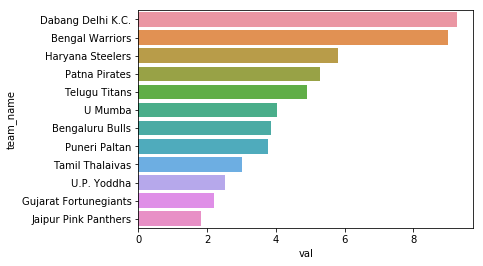

In [95]:
# Plot showing the team having the sucess raids prediction
sns.barplot(x="val", y="team_name", data=df.sort_values('val', ascending=False))
plt.show()

## Team having Successful Tackles
We are using the exactally same stratergy to predict the team with success full tackles as same of predicting raids.

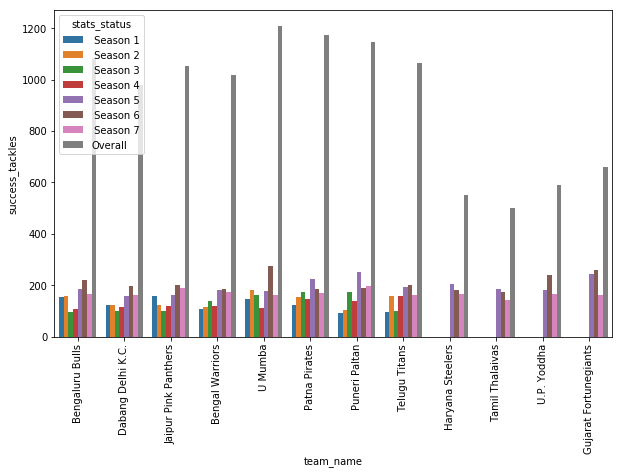

In [96]:
plt.figure(figsize=(10,6))
sns.barplot(x="team_name", y="success_tackles", hue="stats_status", data=teamData)
plt.xticks(rotation=90)
plt.show()

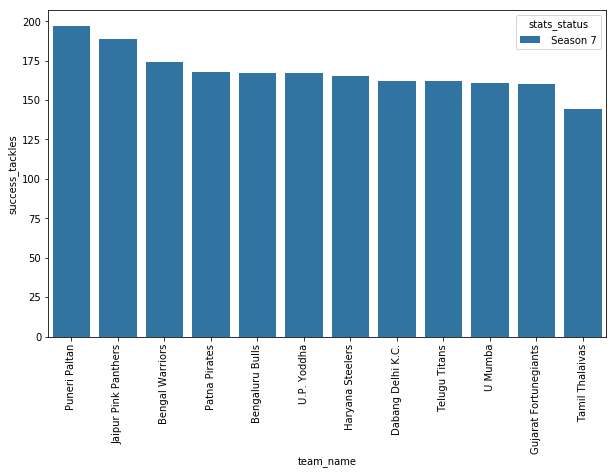

In [97]:
data = teamData[teamData['stats_status'].str.contains('Season 7')]
plt.figure(figsize=(10,6))
sns.barplot(x="team_name", y="success_tackles", hue="stats_status", data=data.sort_values('success_tackles', ascending=False))
plt.xticks(rotation=90)
plt.show()

In [98]:
season_list = teamData['stats_status'].unique().tolist()
season_list.remove('Overall')
df_tackle_team_rank = pd.DataFrame()
for index in range(0, len(season_list)):
    temp = teamData.loc[teamData['stats_status'].str.contains(season_list[index])]
    temp['tackle_rank']= temp['success_tackles'].rank(method='min')
    df_tackle_team_rank = df_tackle_team_rank.append(temp, ignore_index=True)

df_tackle_team_rank = df_tackle_team_rank.sort_values(['stats_status'])
df_tackle_team_rank.head()

,stats_status,team_name,total_matches,wins,losses,draws,total_raids,success_raids,all_outs,unsuccess_raids,empty_raid,success_raid_percent,super_raids,total_tackles,success_tackles,unsuccesful_tackles,tackle_success_rate,super_tackles,green_cards,yellow_cards,red_cards,tackle_rank
0,Season 1,Bengaluru Bulls,16.0,8.0,7.0,1.0,647.0,225.0,20.0,172.0,250.0,45.0,7.0,353.0,153.0,200.0,46.0,10.0,8.0,1.0,0.0,7.0
1,Season 1,Dabang Delhi K.C.,14.0,5.0,8.0,1.0,559.0,246.0,18.0,139.0,174.0,51.0,5.0,370.0,124.0,246.0,36.0,10.0,10.0,0.0,0.0,4.0
2,Season 1,Jaipur Pink Panthers,16.0,12.0,3.0,1.0,621.0,270.0,29.0,125.0,226.0,55.0,9.0,400.0,158.0,242.0,42.0,12.0,5.0,0.0,0.0,8.0
3,Season 1,Bengal Warriors,14.0,4.0,9.0,1.0,546.0,213.0,11.0,146.0,187.0,52.0,11.0,381.0,106.0,275.0,32.0,16.0,5.0,0.0,0.0,3.0
4,Season 1,U Mumba,16.0,9.0,4.0,3.0,624.0,270.0,21.0,134.0,220.0,56.0,12.0,409.0,145.0,264.0,38.0,12.0,3.0,0.0,0.0,6.0


In [99]:
df_tackle_team_rank['formatted_series_name'] = df_tackle_team_rank['stats_status'].str.split('Season ').str[1]
df_tackle_team_rank['formatted_series_name'] = pd.to_numeric(df_tackle_team_rank['formatted_series_name'])

In [100]:
col = ['total_tackles', 'success_tackles', 'unsuccesful_tackles', 'tackle_success_rate', 'super_tackles']
from sklearn.linear_model import LinearRegression
X = df_tackle_team_rank[df_tackle_team_rank['formatted_series_name'] != 7][col].values
y = df_tackle_team_rank[df_tackle_team_rank['formatted_series_name'] != 7]['tackle_rank'].values
reg = LinearRegression().fit(X, y)

In [101]:
X_pred = df_tackle_team_rank[df_tackle_team_rank['formatted_series_name'] == 7][col].values
pred_values = reg.predict(X_pred)

In [102]:
df = pd.DataFrame()
df['val'] = pred_values.round(2)
df['team_name'] = df_tackle_team_rank[df_tackle_team_rank['formatted_series_name'] == 7]['team_name'].values
df.head()

,val,team_name
0,4.17,Tamil Thalaivas
1,5.35,Haryana Steelers
2,5.71,Telugu Titans
3,6.77,Puneri Paltan
4,5.40,Patna Pirates


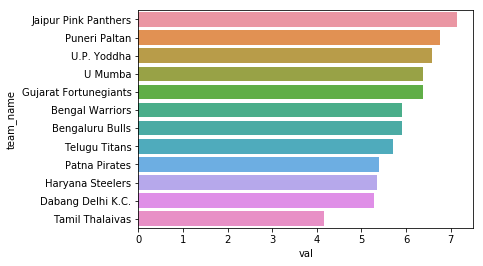

In [103]:
## Average Rank of the players in tackle across all seasons. Plears performing continuously good across all seasons
## are on top
sns.barplot(x="val", y="team_name", data=df.sort_values('val', ascending=False))
plt.show()

## Team having Successful Super Performance Total
We are using the exactally same stratergy to predict the team with success full tackles as same of predicting raids.

In [104]:
teamData.head()

,stats_status,team_name,total_matches,wins,losses,draws,total_raids,success_raids,all_outs,unsuccess_raids,empty_raid,success_raid_percent,super_raids,total_tackles,success_tackles,unsuccesful_tackles,tackle_success_rate,super_tackles,green_cards,yellow_cards,red_cards
0,Season 1,Bengaluru Bulls,16.0,8.0,7.0,1.0,647.0,225.0,20.0,172.0,250.0,45.0,7.0,353.0,153.0,200.0,46.0,10.0,8.0,1.0,0.0
1,Season 2,Bengaluru Bulls,16.0,10.0,6.0,0.0,730.0,194.0,25.0,163.0,373.0,35.0,10.0,341.0,158.0,183.0,48.0,7.0,24.0,0.0,0.0
2,Season 3,Bengaluru Bulls,14.0,2.0,12.0,0.0,603.0,158.0,12.0,148.0,297.0,35.0,9.0,291.0,94.0,197.0,34.0,7.0,5.0,3.0,1.0
3,Season 4,Bengaluru Bulls,14.0,5.0,8.0,1.0,605.0,157.0,9.0,143.0,305.0,33.0,4.0,287.0,109.0,178.0,43.0,15.0,3.0,0.0,0.0
4,Season 5,Bengaluru Bulls,22.0,8.0,11.0,3.0,943.0,336.0,28.0,195.0,412.0,42.0,5.0,480.0,185.0,295.0,42.0,17.0,8.0,0.0,1.0


In [105]:
## Creating dervied column depecting number of all outs conceded in the season by each team
team_names = teamData['team_name'].unique().tolist()
def generateAllOutsConceded():
    df_final = pd.DataFrame()
    for index in range(0, len(team_names)):
        df1 = matchStats[(matchStats['Team1'].str.contains(team_names[index]))].groupby(['SeasonId', 'Team1']
                                                                     )['Team1_all_outs_conceded'].sum().reset_index()
        df2 = matchStats[(matchStats['Team2'].str.contains(team_names[index]))].groupby(['SeasonId', 'Team2']
                                                                     )['Team1_all_outs_conceded'].sum().reset_index()
        df = pd.merge(df1, df2, on=['SeasonId'], how='left')
        
        df_final = df_final.append(df, ignore_index=True)
        
    return df_final

In [201]:
# Getting data for all outs conceded in the tournament by the teams.
allOutsConceded = generateAllOutsConceded()

In [202]:
# Generating derived column all outs conceded by the teams in the matches played
allOutsConceded.fillna(0, inplace=True)
allOutsConceded['all_outs_conceded'] = allOutsConceded['Team1_all_outs_conceded_x'
                                                    ] + allOutsConceded['Team1_all_outs_conceded_y']
allOutsConceded.drop(['Team1_all_outs_conceded_x', 'Team2', 'Team1_all_outs_conceded_y'], axis = 1,  inplace=True)

In [108]:
allOutsConceded.head()

,SeasonId,Team1,all_outs_conceded
0,Season 1,Bengaluru Bulls,30.0
1,Season 2,Bengaluru Bulls,12.0
2,Season 3,Bengaluru Bulls,11.0
3,Season 4,Bengaluru Bulls,18.0
4,Season 5,Bengaluru Bulls,25.0


In [109]:
teamData.head()

,stats_status,team_name,total_matches,wins,losses,draws,total_raids,success_raids,all_outs,unsuccess_raids,empty_raid,success_raid_percent,super_raids,total_tackles,success_tackles,unsuccesful_tackles,tackle_success_rate,super_tackles,green_cards,yellow_cards,red_cards
0,Season 1,Bengaluru Bulls,16.0,8.0,7.0,1.0,647.0,225.0,20.0,172.0,250.0,45.0,7.0,353.0,153.0,200.0,46.0,10.0,8.0,1.0,0.0
1,Season 2,Bengaluru Bulls,16.0,10.0,6.0,0.0,730.0,194.0,25.0,163.0,373.0,35.0,10.0,341.0,158.0,183.0,48.0,7.0,24.0,0.0,0.0
2,Season 3,Bengaluru Bulls,14.0,2.0,12.0,0.0,603.0,158.0,12.0,148.0,297.0,35.0,9.0,291.0,94.0,197.0,34.0,7.0,5.0,3.0,1.0
3,Season 4,Bengaluru Bulls,14.0,5.0,8.0,1.0,605.0,157.0,9.0,143.0,305.0,33.0,4.0,287.0,109.0,178.0,43.0,15.0,3.0,0.0,0.0
4,Season 5,Bengaluru Bulls,22.0,8.0,11.0,3.0,943.0,336.0,28.0,195.0,412.0,42.0,5.0,480.0,185.0,295.0,42.0,17.0,8.0,0.0,1.0


In [200]:
# Concatinating datasets to generate column all outs conceded
teamData_allOutsConceded = pd.merge(teamData, allOutsConceded, left_on= ['stats_status', 'team_name'],
                                    right_on=['SeasonId', 'Team1'], how='left')
teamData_allOutsConceded.drop(['SeasonId', 'Team1'], axis=1, inplace=True)
teamData_allOutsConceded['all_outs_conceded'].fillna(0, inplace=True)
teamData_allOutsConceded.head()

,stats_status,team_name,total_matches,wins,losses,draws,total_raids,success_raids,all_outs,unsuccess_raids,empty_raid,success_raid_percent,super_raids,total_tackles,success_tackles,unsuccesful_tackles,tackle_success_rate,super_tackles,green_cards,yellow_cards,red_cards,all_outs_conceded
0,Season 1,Bengaluru Bulls,16.0,8.0,7.0,1.0,647.0,225.0,20.0,172.0,250.0,45.0,7.0,353.0,153.0,200.0,46.0,10.0,8.0,1.0,0.0,30.0
1,Season 2,Bengaluru Bulls,16.0,10.0,6.0,0.0,730.0,194.0,25.0,163.0,373.0,35.0,10.0,341.0,158.0,183.0,48.0,7.0,24.0,0.0,0.0,12.0
2,Season 3,Bengaluru Bulls,14.0,2.0,12.0,0.0,603.0,158.0,12.0,148.0,297.0,35.0,9.0,291.0,94.0,197.0,34.0,7.0,5.0,3.0,1.0,11.0
3,Season 4,Bengaluru Bulls,14.0,5.0,8.0,1.0,605.0,157.0,9.0,143.0,305.0,33.0,4.0,287.0,109.0,178.0,43.0,15.0,3.0,0.0,0.0,18.0
4,Season 5,Bengaluru Bulls,22.0,8.0,11.0,3.0,943.0,336.0,28.0,195.0,412.0,42.0,5.0,480.0,185.0,295.0,42.0,17.0,8.0,0.0,1.0,25.0


In [199]:
# Creating the derived column super_performance_total based ont he formula stated in the problem statement
teamData_allOutsConceded['super_performance_total'] = teamData_allOutsConceded['super_raids'
                               ] + teamData_allOutsConceded['super_tackles'] + teamData_allOutsConceded['all_outs'
                               ] - teamData_allOutsConceded['all_outs_conceded']

In [112]:
teamData_allOutsConceded.head()

,stats_status,team_name,total_matches,wins,losses,draws,total_raids,success_raids,all_outs,unsuccess_raids,empty_raid,success_raid_percent,super_raids,total_tackles,success_tackles,unsuccesful_tackles,tackle_success_rate,super_tackles,green_cards,yellow_cards,red_cards,all_outs_conceded,super_performance_total
0,Season 1,Bengaluru Bulls,16.0,8.0,7.0,1.0,647.0,225.0,20.0,172.0,250.0,45.0,7.0,353.0,153.0,200.0,46.0,10.0,8.0,1.0,0.0,30.0,7.0
1,Season 2,Bengaluru Bulls,16.0,10.0,6.0,0.0,730.0,194.0,25.0,163.0,373.0,35.0,10.0,341.0,158.0,183.0,48.0,7.0,24.0,0.0,0.0,12.0,30.0
2,Season 3,Bengaluru Bulls,14.0,2.0,12.0,0.0,603.0,158.0,12.0,148.0,297.0,35.0,9.0,291.0,94.0,197.0,34.0,7.0,5.0,3.0,1.0,11.0,17.0
3,Season 4,Bengaluru Bulls,14.0,5.0,8.0,1.0,605.0,157.0,9.0,143.0,305.0,33.0,4.0,287.0,109.0,178.0,43.0,15.0,3.0,0.0,0.0,18.0,10.0
4,Season 5,Bengaluru Bulls,22.0,8.0,11.0,3.0,943.0,336.0,28.0,195.0,412.0,42.0,5.0,480.0,185.0,295.0,42.0,17.0,8.0,0.0,1.0,25.0,25.0


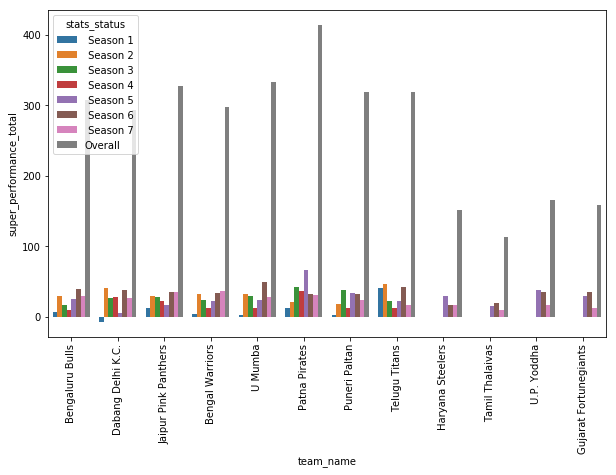

In [113]:
plt.figure(figsize=(10,6))
sns.barplot(x="team_name", y="super_performance_total", hue="stats_status", data=teamData_allOutsConceded)
plt.xticks(rotation=90)
plt.show()

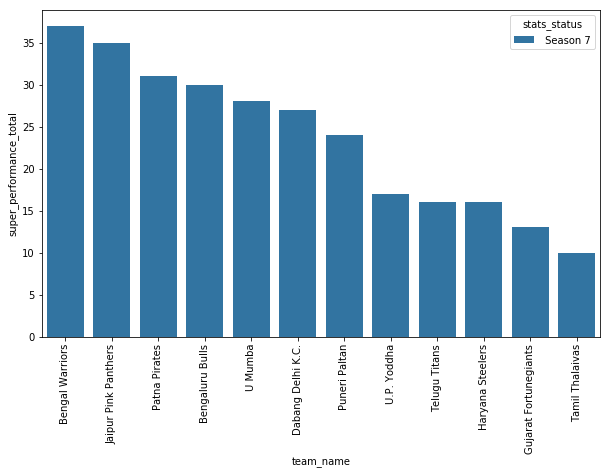

In [114]:
data = teamData_allOutsConceded[teamData_allOutsConceded['stats_status'].str.contains('Season 7')]
plt.figure(figsize=(10,6))
sns.barplot(x="team_name", y="super_performance_total", hue="stats_status", data=data.sort_values('super_performance_total', ascending=False))
plt.xticks(rotation=90)
plt.show()

In [115]:
season_list = teamData['stats_status'].unique().tolist()
season_list.remove('Overall')
df_super_performance_total_team_rank = pd.DataFrame()
for index in range(0, len(season_list)):
    temp = teamData_allOutsConceded.loc[teamData['stats_status'].str.contains(season_list[index])]
    temp['super_performance_total_rank']= temp['super_performance_total'].rank(method='min')
    df_super_performance_total_team_rank = df_super_performance_total_team_rank.append(temp, ignore_index=True)

df_super_performance_total_team_rank = df_super_performance_total_team_rank.sort_values(['stats_status'])
df_super_performance_total_team_rank.head()

,stats_status,team_name,total_matches,wins,losses,draws,total_raids,success_raids,all_outs,unsuccess_raids,empty_raid,success_raid_percent,super_raids,total_tackles,success_tackles,unsuccesful_tackles,tackle_success_rate,super_tackles,green_cards,yellow_cards,red_cards,all_outs_conceded,super_performance_total,super_performance_total_rank
0,Season 1,Bengaluru Bulls,16.0,8.0,7.0,1.0,647.0,225.0,20.0,172.0,250.0,45.0,7.0,353.0,153.0,200.0,46.0,10.0,8.0,1.0,0.0,30.0,7.0,5.0
1,Season 1,Dabang Delhi K.C.,14.0,5.0,8.0,1.0,559.0,246.0,18.0,139.0,174.0,51.0,5.0,370.0,124.0,246.0,36.0,10.0,10.0,0.0,0.0,40.0,-7.0,1.0
2,Season 1,Jaipur Pink Panthers,16.0,12.0,3.0,1.0,621.0,270.0,29.0,125.0,226.0,55.0,9.0,400.0,158.0,242.0,42.0,12.0,5.0,0.0,0.0,38.0,12.0,6.0
3,Season 1,Bengal Warriors,14.0,4.0,9.0,1.0,546.0,213.0,11.0,146.0,187.0,52.0,11.0,381.0,106.0,275.0,32.0,16.0,5.0,0.0,0.0,34.0,4.0,4.0
4,Season 1,U Mumba,16.0,9.0,4.0,3.0,624.0,270.0,21.0,134.0,220.0,56.0,12.0,409.0,145.0,264.0,38.0,12.0,3.0,0.0,0.0,42.0,3.0,2.0


In [116]:
df_super_performance_total_team_rank['formatted_series_name'] = df_super_performance_total_team_rank[
    'stats_status'].str.split('Season ').str[1]
df_super_performance_total_team_rank['formatted_series_name'] = pd.to_numeric(
    df_super_performance_total_team_rank['formatted_series_name'])

In [117]:
col = ['super_performance_total']
from sklearn.linear_model import LinearRegression
X = df_super_performance_total_team_rank[df_super_performance_total_team_rank
                                         ['formatted_series_name'] != 7][col].values
y = df_super_performance_total_team_rank[df_super_performance_total_team_rank
                                         ['formatted_series_name'] != 7]['super_performance_total_rank'].values
reg = LinearRegression().fit(X, y)

In [118]:
X_pred = df_super_performance_total_team_rank[df_super_performance_total_team_rank[
    'formatted_series_name'] == 7][col].values
pred_values = reg.predict(X_pred)

In [119]:
df = pd.DataFrame()
df['val'] = pred_values.round(2)
df['team_name'] = df_super_performance_total_team_rank[df_super_performance_total_team_rank[
    'formatted_series_name'] == 7]['team_name'].values
df.head()

,val,team_name
0,2.48,Tamil Thalaivas
1,3.51,Haryana Steelers
2,3.51,Telugu Titans
3,4.88,Puneri Paltan
4,6.09,Patna Pirates


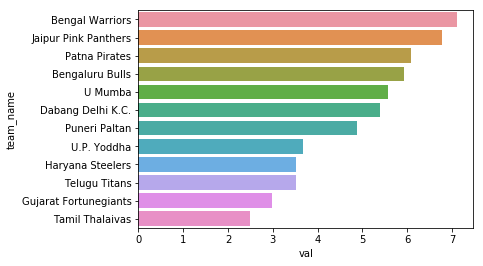

In [120]:
sns.barplot(x="val", y="team_name", data=df.sort_values('val', ascending=False))
plt.show()